In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans ,DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/malumot4/malumot.csv',index_col='Id')

In [2]:
df.head()

,sozlength,matnlength,Species
Id,,,
1,56,5,negativ
2,72,6,negativ
3,127,7,negativ
4,100,7,negativ
5,217,11,negativ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sozlength   24 non-null     int64 
 1   matnlength  24 non-null     int64 
 2   Species     24 non-null     object
dtypes: int64(2), object(1)
memory usage: 768.0+ bytes


In [4]:
df.describe()

,sozlength,matnlength
count,24.000000,24.000000
mean,60.916667,6.083333
std,43.146784,2.976965
min,15.000000,2.000000
25%,31.500000,3.000000
50%,55.000000,6.000000
75%,72.000000,8.250000
max,217.000000,12.000000


ma'lumotlari

In [5]:
df.isna().sum()

sozlength     0
matnlength    0
Species       0
dtype: int64

In [6]:
for i in range(2):
    fig = px.scatter(x=df.iloc[:,i],color=df['Species'])
    fig.update_layout(title=df.columns[i]+ ' for each Species')
    fig.update_xaxes(title_text=df.columns[i])
    fig.update_yaxes(title_text="Measures")
    fig.show()

In [7]:
fig = px.scatter(data_frame=df,x='sozlength',y='matnlength' , color='Species')
fig.update_layout(title='soz Length vs matn Length')
fig.show()

In [8]:
for i in range(2):
    fig = px.histogram(df, x=df.columns[i], color="Species", facet_col="Species", histnorm="probability density", nbins=100)
    fig.update_layout(title="Density distribution of "+df.columns[i]+" by Species")
    fig.show()

In [9]:
fig = px.pie(values=df['Species'].value_counts().values,names=df['Species'].value_counts().index)
fig.update_layout(title="Species")
fig.show()

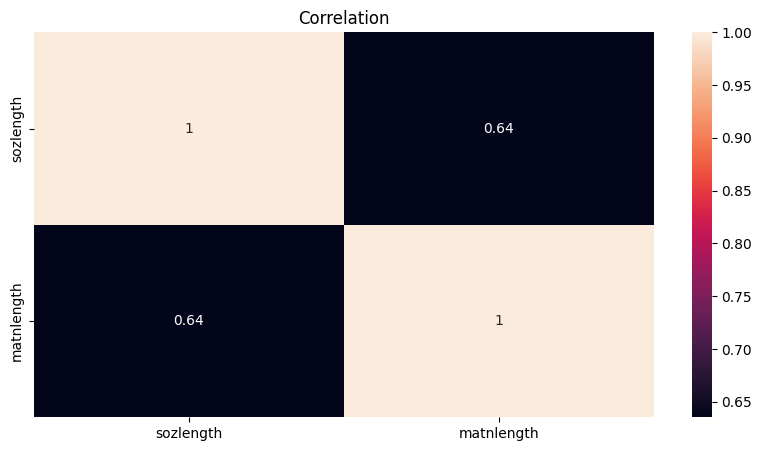

In [10]:
plt.figure(figsize=(10,5)) 
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [11]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [12]:
df.head()

,sozlength,matnlength,Species
Id,,,
1,56,5,0
2,72,6,0
3,127,7,0
4,100,7,0
5,217,11,0


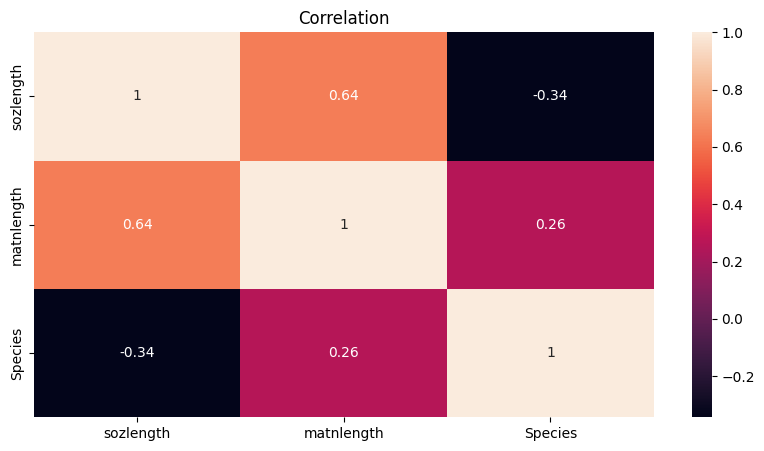

In [13]:
plt.figure(figsize=(10,5)) 
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

Klassifikatsiya

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Accuracy =  100.0  %


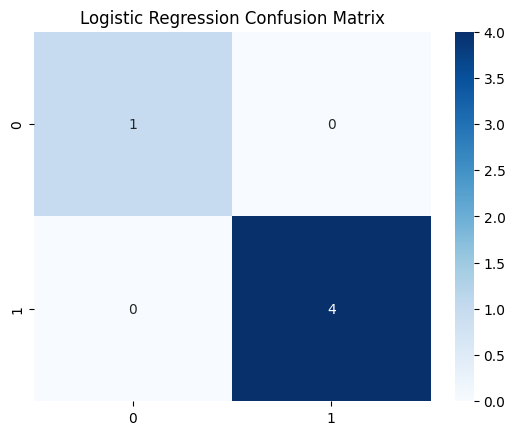

In [19]:
y_pred = lr.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('Logistic Regression Confusion Matrix');

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy =  80.0  %


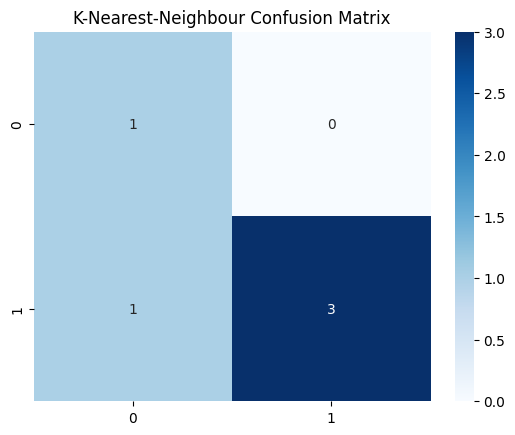

In [21]:
y_pred = knn.predict(X_test)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('K-Nearest-Neighbour Confusion Matrix');

In [22]:
ln_svm = SVC(kernel='linear')
ln_svm.fit(X_train,y_train)

SVC(kernel='linear')

Accuracy =  80.0  %


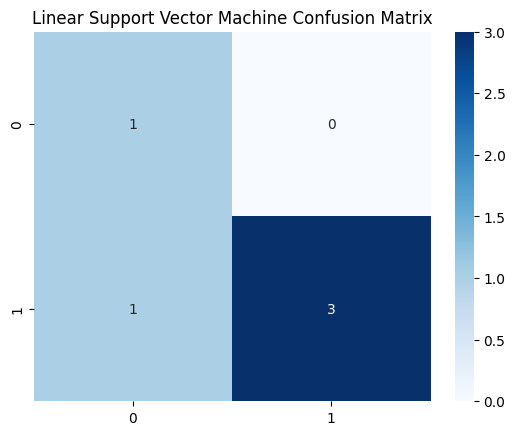

In [23]:
y_pred = ln_svm.predict(X_test)
ln_svm_train_acc = round(accuracy_score(y_train,ln_svm.predict(X_train))*100,2)
ln_svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',ln_svm_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('Linear Support Vector Machine Confusion Matrix');

In [24]:
kr_svm = SVC(kernel='rbf')
kr_svm.fit(X_train,y_train)

SVC()

Accuracy =  80.0  %


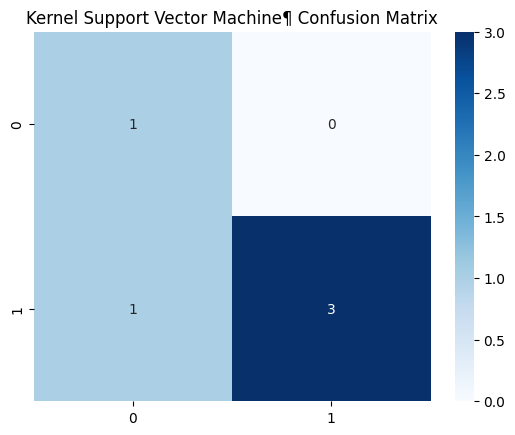

In [25]:
y_pred = kr_svm.predict(X_test)
kr_svm_train_acc = round(accuracy_score(y_train,kr_svm.predict(X_train))*100,2)
kr_svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',kr_svm_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('Kernel Support Vector Machine¶ Confusion Matrix');

In [26]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy =  100.0  %


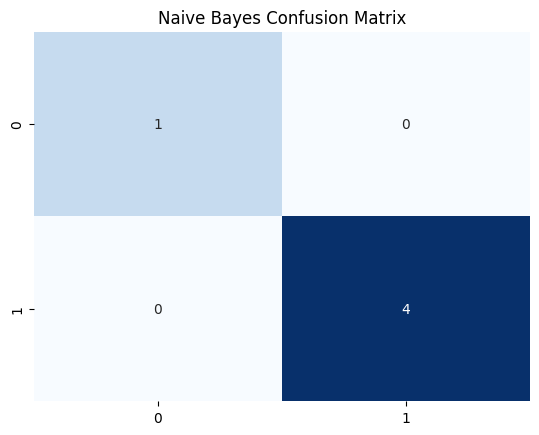

In [27]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy =  80.0  %


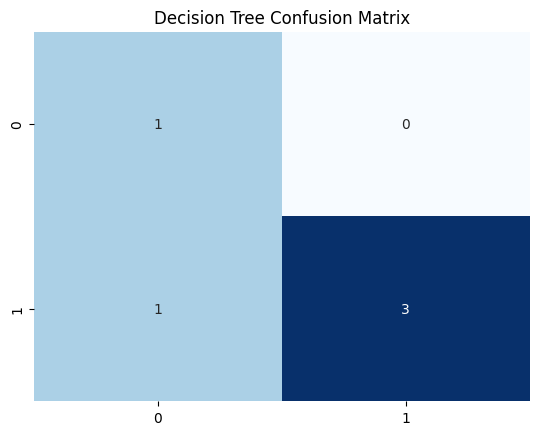

In [29]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

In [30]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Accuracy =  80.0  %


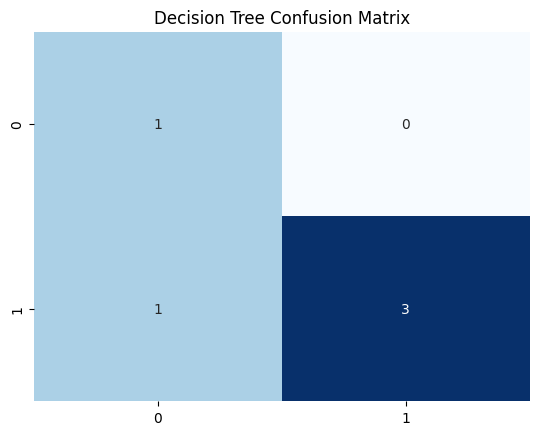

In [31]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

In [32]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Linear Support Vector Machines',
        'Kernel Support Vector Machines', 'Gaussian Naive Bayes','Decision Tree',
        'Random Forest'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,ln_svm_train_acc,kr_svm_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,ln_svm_test_acc,kr_svm_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]
})

models.sort_values(by='Training Accuracy', ascending=False)

In [33]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,84.210000,100.000000
4,Gaussian Naive Bayes,63.160000,100.000000
1,K Nearest Neighbors,84.210000,80.000000
2,Linear Support Vector Machines,73.680000,80.000000
3,Kernel Support Vector Machines,73.680000,80.000000
5,Decision Tree,100.000000,80.000000
6,Random Forest,100.000000,80.000000


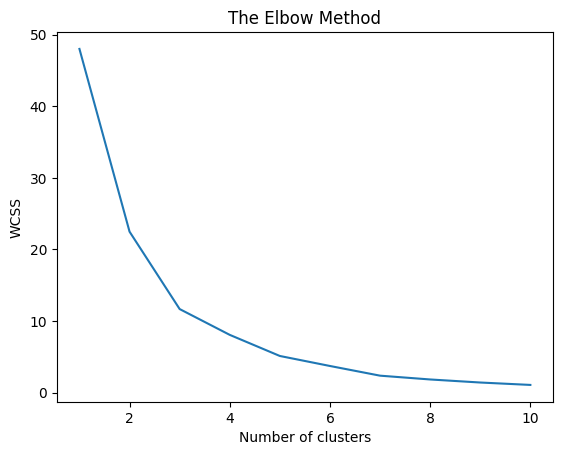

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [36]:
kmeans_ari_score = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index: {kmeans_ari_score}")
kmeans_nmi_score = normalized_mutual_info_score(y, y_kmeans)
print(f"Normalized Mutual Information: {kmeans_nmi_score}")

Adjusted Rand Index: -0.026590693257359924
Normalized Mutual Information: 0.05106933850993372


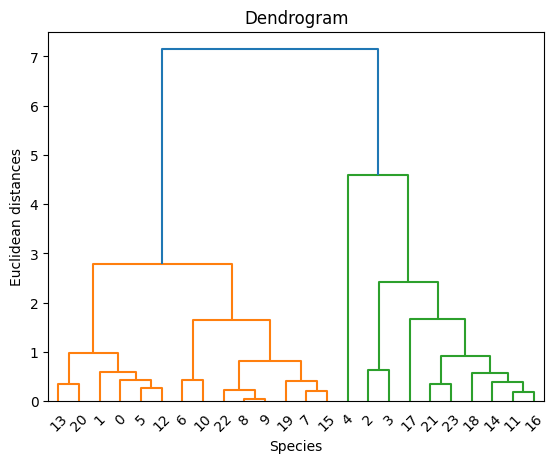

In [37]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
# The graph shows that we should choose 2 but we already know that they are 3 but 2 of them are so similar
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [39]:
hc_ari_score = adjusted_rand_score(y, y_hc)
print(f"Adjusted Rand Index: {hc_ari_score}")
hc_nmi_score = normalized_mutual_info_score(y, y_hc)
print(f"Normalized Mutual Information: {hc_nmi_score}")

Adjusted Rand Index: 0.0037938665823585203
Normalized Mutual Information: 0.0744019308699567


In [40]:
dbscan = DBSCAN()
y_dbscan = dbscan.fit(X)

In [41]:
db_ari_score = adjusted_rand_score(y, y_dbscan.labels_)
print(f"Adjusted Rand Index: {db_ari_score}")
db_nmi_score = normalized_mutual_info_score(y, y_dbscan.labels_)
print(f"Normalized Mutual Information: {db_nmi_score}")

Adjusted Rand Index: 0.027750887383026782
Normalized Mutual Information: 0.08541241553234812


In [42]:
models = pd.DataFrame({
    'Model': [
        'Kmeans','Hierarchical Clustering','DBSCAN',
        
    ],
    'Adjusted Rand Index': [
        kmeans_ari_score,hc_ari_score,db_ari_score
    ],
    'Normalized Mutual Information': [
       kmeans_nmi_score,hc_nmi_score,db_nmi_score
    ]
})

In [43]:
models.sort_values(by='Adjusted Rand Index', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Adjusted Rand Index,Normalized Mutual Information
2,DBSCAN,0.027751,0.085412
1,Hierarchical Clustering,0.003794,0.074402
0,Kmeans,-0.026591,0.051069


In [44]:
models.sort_values(by='Normalized Mutual Information', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Adjusted Rand Index,Normalized Mutual Information
2,DBSCAN,0.027751,0.085412
1,Hierarchical Clustering,0.003794,0.074402
0,Kmeans,-0.026591,0.051069
